### Table of content

<a href="#Step-1.-Open-the-data-file-and-study-the-general-information">Step 1. Open the data file and study the general information<a/>

<a href="#Step-2.-Prepare-the-data">Step 2. Prepare the data</a>
* <a href="#Convert-the-data-to-the-necessary-types">Convert the data to the necessary types</a>
* <a href="#Find-and-eliminate-errors-in-the-data">Find and eliminate errors in the data</a>
* <a href="#The-number-of-calls-made-and-minutes-used-per-month">The number of calls made and minutes used per month</a>
* <a href="#The-number-of-text-messages-sent-per-month">The number of text messages sent per month</a>
* <a href="#The-volume-of-data-per-month">The volume of data per month</a>
* <a href="#The-monthly-revenue-from-each-user">The monthly revenue from each user</a>

<a href="#Step-3.-Analyze-the-data">Step 3. Analyze the data</a>  
* <a href="#Minutes,-texts,-and-volume-of-data-the-users-of-each-plan-require-per-month.">Minutes, texts, and volume of data the users of each plan require per month<a/>
* <a href="#Mean,-dispersion,-and-standard-deviation.">Mean, dispersion, and standard deviation<a/>
* <a href="Histograms-and-distributions">Histograms and distributions<a/>
    
<a href="#Step-4.-Test-the-hypotheses">Step 4. Test the hypotheses<a/>
* <a href="#The-average-revenue-from-users-of-Ultimate-and-Surf-calling-plans-differs.">The average revenue from users of Ultimate and Surf calling plans differs<a/>
* <a href="#The-average-revenue-from-users-in-NY-NJ-area-is-different-from-that-of-the-users-from-other-regions.">The average revenue from users in NY-NJ area is different from that of the users from other regions.<a/>
    
<a href="#Step-5.-Write-an-overall-conclusion">Step 5. Write an overall conclusion<a/>

### Step 1. Open the data file and study the general information

In [1]:
# load libraries
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

# load the csv data files to python and display the size and five ten rows
users = pd.read_csv('/datasets/megaline_users.csv')
display(users.info())
display(users.head(10))

calls = pd.read_csv('/datasets/megaline_calls.csv')
display(calls.info())
display(calls.head(10))

internet = pd.read_csv('/datasets/megaline_internet.csv')
display(internet.info())
display(internet.head(10))

messages = pd.read_csv('/datasets/megaline_messages.csv')
display(messages.info())
display(messages.head(10))

plans = pd.read_csv('/datasets/megaline_plans.csv')
display(plans.info())
display(plans.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Conclusion**

We are provided with five different data sets on the users' information, calls, messages, internet and plans.

**Users**  
The dataset consists of 500 rows and 8 columns in total, 6 columns with categorical variables (['user_id'](), ['first_name'](), ['last_name'](), ['city'](), ['plan'](), and ['churn_date']()) and 2 columns with quantitative variables (['age']() and ['reg_date']()). We have only one column with missing values (['churn_date']()).

**Calls**  
The dataset consists of 137735 rows and 4 columns in total, 2 columns with categorical variables (['id']() and ['user_id']()) and 2 columns with quantitative variables (['call_date']() and ['duration']()).

**Internet**  
The dataset consists of 104825 rows and 4 columns in total, 2 columns with categorical variables (['id']() and ['user_id']()) and 2 columns with quantitative variables (['session_date']() and ['mb_used']()).

**Messages**  
The dataset consists of 76051 rows and 3 columns in total, 2 columns with categorical variables (['id']() and ['user_id']()) and  1columns with quantitative variables (['message_date']()).

**Plans**  
The dataset consists of 2 rows and 8 columns in total, 2 columns with categorical variables (['id']() and ['user_id']()) and  1columns with quantitative variables (['message_date']()).



[<a href="#Table-of-content">Back to top</a>]

### Step 2. Prepare the data

#### Convert the data to the necessary types

**Users**

In [2]:
# >>>REG_DATE<<<

# convert the data types of values in the column to datetime data type
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# display the data type of the column 
display(users['reg_date'].dtype)


# >>>CHURN_DATE<<<

# convert the data types of values in the column to datetime data type
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

# display the data type of the column 
display(users['churn_date'].dtype)

# display the first five rows of the dataframe
display(users.head(10))

dtype('<M8[ns]')

dtype('<M8[ns]')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


**Calls**

In [3]:
# >>>CALL_DATE<<<

# convert the data types of values in the column to datetime data type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

# display the data type of the column 
display(calls['call_date'].dtype)


#>>>DURATION<<<

# round up and change data type to integer
calls['duration'] = np.ceil(calls['duration']).astype('int')

# display data type and first five rows
display(calls['duration'].dtype)
display(calls.head())

dtype('<M8[ns]')

dtype('int64')

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


**Internet**

In [4]:
# >>>SESSION_DATE<<<

# convert the data types of values in the column to datetime data type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

# display the data type of the column 
display(internet['session_date'].dtype)

dtype('<M8[ns]')

**Messages**

In [5]:
# >>>MESSAGE_DATE<<<

# convert the data types of values in the column to datetime data type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

# display the data type of the column 
display(messages['message_date'].dtype)

dtype('<M8[ns]')

**Conclusion**  

After studying the general information for each dataframe, we decided to converted the data type of columns with date values from string to datetime format. We made this conversion so that we will be able to make calculations with columns.

For [users]() dataframe, the columns' data type changed are ['reg_date']() and ['churn_date'](). For [calls]() dataframe, we only have one column ['call_date'](), for [internet]() dataframe, ['session_date']() column, and for [messgaes]() dataframe, ['message_date']().

We also converted the data type of the ['duration']() column in [calls]() dataframe from floating point to integer, and rounded up the values.


[<a href="#Table-of-Content">Back to top</a>]

#### Find and eliminate errors in the data

In [6]:
# check for duplicates in the dataframes
display("The number of duplicates in users dataframe is: {}".format(users.duplicated().sum()))
display("The number of duplicates in calls dataframe is: {}".format(calls.duplicated().sum()))
display("The number of duplicates in internet dataframe is: {}".format(internet.duplicated().sum()))
display("The number of duplicates in users dataframe is: {}".format(messages.duplicated().sum()))


# >>> USERS <<<

# display the statistics of the dataset
display(users.describe())



# >>> CALLS <<<

# display the statistics of the dataset
display(calls.describe())

# drop calls with duration of 0.0 minute
calls = calls.drop(calls[calls.duration == 0].index)

# display the number of calls with duration of 0
display(len(calls[calls['duration'] == 0]))




# >>> INTERNET <<<

# display the statistics of the column
display(internet.describe())

# drop rows with volume of internet of 0
internet = internet.drop(internet[internet.mb_used == 0].index)

# display the number of rows with volume of internet of 0
display(len(internet[internet['mb_used'] == 0]))

        
        
# >>> MESSAGES <<<

# display the statistics of the column
display(messages.describe())

'The number of duplicates in users dataframe is: 0'

'The number of duplicates in calls dataframe is: 0'

'The number of duplicates in internet dataframe is: 0'

'The number of duplicates in users dataframe is: 0'

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.146673
std,139.416268,5.953919
min,1000.000000,0.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


0

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


0

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


**Conclusion**

We discovered that there is no duplicate in any of our dataframes.  

When checking the statistics of the dataframes, we noticed that some calls have a duration of 0 minute. These calls might be missed calls. So we decided to drop them from the [calls]() dataframe as there won't be charges on the calls.

We also discovered that there are some days where the volume of internet used is 0 megabyte. This could mean that the user was on a public wifi or home wifi throughout the day. We therefore, decided to drop the rows in our dataframe.

[<a href="#Table-of-content">Back to top</a>]

#### The number of calls made and minutes used per month

In [7]:
# extract the month from the date format
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
display(calls.head())

# create pivot table
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

# change the column names
calls_pivot.columns = ['calls_per_month', 'mins_per_month']

# turn index to column
calls_pivot.reset_index(level=['user_id', 'month'], inplace=True)

# sort by 'user_id' and 'month' columns
calls_pivot = calls_pivot.sort_values(by=['user_id', 'month'])
display(calls_pivot.head(10))

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


,user_id,month,calls_per_month,mins_per_month
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315
3,1001,10,47,393
4,1001,11,49,426
5,1001,12,46,412
6,1002,10,8,59
7,1002,11,48,386
8,1002,12,38,384
9,1003,12,118,1104


**Conclusion**

To have more understanding about our data, we decided to calculate the number of calls made and minutes used by each user every month. We did this by first extracting the month from the ['call_date']() column, and saving the results in a new column ['month']() which was added to the [calls]() dataframe.

We then created a pivot table using ['user_id']() and ['month']() as the index, and ['duration']() as the values. We passed the argument [count]() and [sum]() to calculate the number of calls made and minutes used respectively. 

[<a href="#Table-of-content">Back to top</a>]

#### The number of text messages sent per month

In [8]:
# extract the month from the date format
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages.head())

# create a pivot table
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')

# change the column names
messages_pivot.columns = ['messages_per_month']

# turn index to column
messages_pivot.reset_index(level=['user_id', 'month'], inplace=True)

# sort by 'user_id' and 'month' columns
messages_pivot = messages_pivot.sort_values(by=['user_id', 'month'])
display(messages_pivot.head(10))

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


**Conclusion**

To calculate the number of text mesages sent every month by each user, we extracted the month from the ['message_date']() column, and saved the results in a new column ['month']() which was added to the [messgaes]() dataframe.

We then created a pivot table using ['user_id']() and ['month']() as the index, and ['message_date']() as the values. We passed the argument [count]() to calculate the number of text messages sent.

[<a href="#Table-of-content">Back to top</a>]

#### The volume of data per month

In [9]:
# extract the month from the date format
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
display(internet.head())

# create a pivot table to calclate internet usage per month, round the result up and change data type to integer
internet_pivot = internet.pivot_table(
    index=['user_id', 'month'], values='mb_used', aggfunc='sum'
    ).transform(np.ceil).astype('int')

# change the column names
internet_pivot.columns = ['mb_used_per_month']

# convert megabyte to gigabyte and round the result up
internet_pivot['gb_used_per_month'] = np.ceil(internet_pivot['mb_used_per_month'] / 1024).astype('int')

# turn index to column
internet_pivot.reset_index(level=['user_id', 'month'], inplace=True)

# sort by 'user_id' and 'month' columns
internet_pivot = internet_pivot.sort_values(by=['user_id', 'month'])
display(internet_pivot.head(10))

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8


,user_id,month,mb_used_per_month,gb_used_per_month
0,1000,12,1902,2
1,1001,8,6920,7
2,1001,9,13315,14
3,1001,10,22331,22
4,1001,11,18505,19
5,1001,12,19370,19
6,1002,10,6553,7
7,1002,11,19346,19
8,1002,12,14397,15
9,1003,12,27045,27


**Conclusion**

To calculate the volume of data used every month by each user, we extracted the month from the ['session_date']() column, and saved the results in a new column ['month']() which was added to the [internet]() dataframe.

We then created a pivot table using ['user_id']() and ['month']() as the index, and ['mb_used']() as the values. We passed the argument [sum]() to calculate the volume of data used every month by each users and then rounding the result up since it is in the company's policy to round up the volume of data used monthly.

[<a href="#Table-of-content">Back to top</a>]

#### The monthly revenue from each user

In [10]:
# create a new dataset from users dataset
users_updated = users[['user_id', 'plan']]
display(users_updated.head())

# merge dataset with calls, messages, internet usage, and users' data into one dataset
table1 = pd.merge(left = calls_pivot, right = messages_pivot, on=['user_id', 'month'], how='outer').fillna(0) 
table2 = pd.merge(left=table1, right=internet_pivot, on=['user_id', 'month'], how='outer').fillna(0)
table3 = pd.merge(left=users_updated, right=table2, on='user_id', how='outer')

display(table3.head(10))


,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


,user_id,plan,month,calls_per_month,mins_per_month,messages_per_month,mb_used_per_month,gb_used_per_month
0,1000,ultimate,12.0,16.0,124.0,11.0,1902.0,2.0
1,1001,surf,8.0,22.0,182.0,30.0,6920.0,7.0
2,1001,surf,9.0,38.0,315.0,44.0,13315.0,14.0
3,1001,surf,10.0,47.0,393.0,53.0,22331.0,22.0
4,1001,surf,11.0,49.0,426.0,36.0,18505.0,19.0
5,1001,surf,12.0,46.0,412.0,44.0,19370.0,19.0
6,1002,surf,10.0,8.0,59.0,15.0,6553.0,7.0
7,1002,surf,11.0,48.0,386.0,32.0,19346.0,19.0
8,1002,surf,12.0,38.0,384.0,41.0,14397.0,15.0
9,1003,surf,12.0,118.0,1104.0,50.0,27045.0,27.0


In [11]:

def revenue(row):
    """
    The function returns the monthly revenue of users according to the number of calls and messages used, internet usage,  
    and the calling plan.
    """
    plan = row['plan']
    call = row['mins_per_month']
    msg = row['messages_per_month']
    internet = row['mb_used_per_month']
    
     
    if plan == 'surf':
        if call <= 500:
            surf_calls = 0
        else:
            surf_calls = 0.03 * (call - 500)
        
        if msg <= 50:
            surf_messages = 0
        else:
            surf_messages = 0.03 * (msg - 50)
            
        if internet <= 15360:
            surf_internet = 0
        else:
            surf_internet = 10 * np.ceil((internet - 15360)/1024)
        
        cost = 20 + surf_calls + surf_messages + surf_internet
            
            
            
    elif plan == 'ultimate':
        
        if call <= 3000:
            ultimate_calls = 0
        else:
            ultimate_calls = 0.01 * (call - 3000)
            
        if msg <= 1000:
            ultimate_messages = 0
        else:
            ultimate_messages = 0.01 * (msg - 1000)
        
        if internet <= 30720:
            revenue_internet = 0
        else:
            revenue_internet = 7 * np.ceil((internet - 30720)/1024)
        
        cost = 70 + ultimate_calls + ultimate_messages + revenue_internet
        
        
    return cost


table3['monthly_revenue'] = table3.apply(revenue,axis=1)
display(table3.head(10))

,user_id,plan,month,calls_per_month,mins_per_month,messages_per_month,mb_used_per_month,gb_used_per_month,monthly_revenue
0,1000,ultimate,12.0,16.0,124.0,11.0,1902.0,2.0,70.00
1,1001,surf,8.0,22.0,182.0,30.0,6920.0,7.0,20.00
2,1001,surf,9.0,38.0,315.0,44.0,13315.0,14.0,20.00
3,1001,surf,10.0,47.0,393.0,53.0,22331.0,22.0,90.09
4,1001,surf,11.0,49.0,426.0,36.0,18505.0,19.0,60.00
5,1001,surf,12.0,46.0,412.0,44.0,19370.0,19.0,60.00
6,1002,surf,10.0,8.0,59.0,15.0,6553.0,7.0,20.00
7,1002,surf,11.0,48.0,386.0,32.0,19346.0,19.0,60.00
8,1002,surf,12.0,38.0,384.0,41.0,14397.0,15.0,20.00
9,1003,surf,12.0,118.0,1104.0,50.0,27045.0,27.0,158.12


**Conclusion**

We decided to calculate the monthly revenue to know how much US dollars each users spend on plan every month. We first created a dataframe with ['user_id']() and ['plan']() as the columns and merged it with the dataframes we saved the our results of the number of calls made, minutes used, the number of text messages sent, and volume of data per month. We go ahead by creating a function that returns the monthly revenue of users according to the number of calls and messages used, internet usage, and the calling plan, saved the results in a new column ['monthly_revenue]().

[<a href="#Table-of-content">Back to top</a>]

#### Outliers

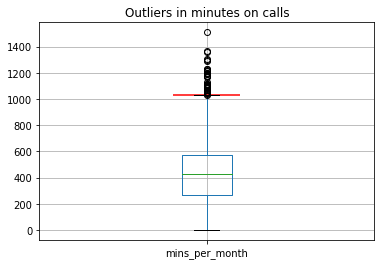

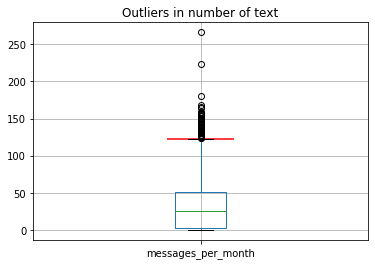

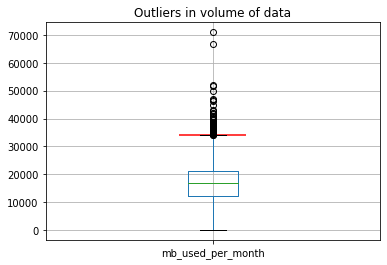

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 2302
Data columns (total 9 columns):
user_id               2103 non-null int64
plan                  2103 non-null object
month                 2103 non-null float64
calls_per_month       2103 non-null float64
mins_per_month        2103 non-null float64
messages_per_month    2103 non-null float64
mb_used_per_month     2103 non-null float64
gb_used_per_month     2103 non-null float64
monthly_revenue       2103 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 164.3+ KB


None

,user_id,plan,month,calls_per_month,mins_per_month,messages_per_month,mb_used_per_month,gb_used_per_month,monthly_revenue
0,1000,ultimate,12.0,16.0,124.0,11.0,1902.0,2.0,70.00
1,1001,surf,8.0,22.0,182.0,30.0,6920.0,7.0,20.00
2,1001,surf,9.0,38.0,315.0,44.0,13315.0,14.0,20.00
3,1001,surf,10.0,47.0,393.0,53.0,22331.0,22.0,90.09
4,1001,surf,11.0,49.0,426.0,36.0,18505.0,19.0,60.00


In [12]:
# calculate the quartiles for column 'age_posted'
Q1_mins = table3['mins_per_month'].quantile(0.25)
Q3_mins = table3['mins_per_month'].quantile(0.75)
IQR_mins = Q3_mins - Q1_mins

# title of the chart 
plt.title("Outliers in minutes on calls")

# plot the boxplot
table3.boxplot('mins_per_month')
plt.hlines(y=Q3_mins+1.5*IQR_mins, xmin=0.9, xmax=1.1, color='red')
plt.show()


# calculate the quartiles for column 'age_posted'
Q1_msg = table3['messages_per_month'].quantile(0.25)
Q3_msg = table3['messages_per_month'].quantile(0.75)
IQR_msg = Q3_msg - Q1_msg

# title of the chart 
plt.title("Outliers in number of text")

# plot the boxplot
table3.boxplot('messages_per_month')
plt.hlines(y=Q3_msg+1.5*IQR_msg, xmin=0.9, xmax=1.1, color='red')
plt.show()


# calculate the quartiles for column 'age_posted'
Q1_mb = table3['mb_used_per_month'].quantile(0.25)
Q3_mb = table3['mb_used_per_month'].quantile(0.75)
IQR_mb = Q3_mb - Q1_mb

# title of the chart 
plt.title("Outliers in volume of data")

# plot the boxplot
table3.boxplot('mb_used_per_month')
plt.hlines(y=Q3_mb+1.5*IQR_mb, xmin=0.9, xmax=1.1, color='red')
plt.show()


# create a new dataframe witouth the outliers
megaline = table3.query('mins_per_month <= 1010 and messages_per_month <= 125 and mb_used_per_month <= 30500')

# display the size of the dataset
display(megaline.info())

# display the first five rows of the dataset
display(megaline.head())

**Conclusion**

We decided to determine the upper limits of outliers for just three parameters (['mins_per_month'](), ['messages_per_month'](), and ['mb_used_per_month']()).

We first calculated both the first quartile (Q1) and third quartile (Q3) for each parameters by using the [.quantile()]() method, and then calculated the interquartile range by substracting Q3 from Q1.

The next step is to determine the range of the axes, draw a boxplot for each parameters using the [.boxplot()]() method, and indicate where the upper limit of outliers begin with a red line.  
The decision made based on each parameteres are as follows:


**['mins_per_month]():** with the red line placed at about 1010 minutes, we concluded that all other calls that lasted more than that are outliers.  
**['messages_per_month']():** with the red line placed at 125, we concluded that the number of messages sent that exceed 125 is considered outliers.  
**['mb_used_per_month']():** with the red line placed at 30500 megabyte, we decided that volume of data that exceed the red line are outliers.  

So we decided to filter out the outliers from the merged dataframe and store it in a new dataframe [megaline](). Now we have 2103 rows in our new dataset with 9 columns.

[<a href="#Table-of-content">Back to top</a>]

### Step 3. Analyze the data

#### Minutes, texts, and volume of data the users of each plan require per month.

,month,mb_used_per_month,messages_per_month,mins_per_month
0,1.0,9750.0,21.0,406.0
1,2.0,109615.0,108.0,2673.0
2,3.0,306957.0,351.0,7590.0
3,4.0,585070.0,750.0,16534.0
4,5.0,975646.0,1530.0,27305.0
5,6.0,1332777.0,1943.0,37829.0
6,7.0,1812075.0,2741.0,48514.0
7,8.0,2333554.0,3775.0,56864.0
8,9.0,2879872.0,4997.0,72540.0
9,10.0,3525178.0,6408.0,89075.0


,month,mb_used_per_month,messages_per_month,mins_per_month
0,1.0,27674.0,62.0,774.0
1,2.0,119904.0,151.0,2822.0
2,3.0,121748.0,130.0,2371.0
3,4.0,268611.0,386.0,6471.0
4,5.0,419046.0,698.0,10945.0
5,6.0,622965.0,1111.0,16274.0
6,7.0,824036.0,1535.0,21590.0
7,8.0,1050103.0,2253.0,25106.0
8,9.0,1197586.0,2696.0,31520.0
9,10.0,1490793.0,3137.0,39836.0


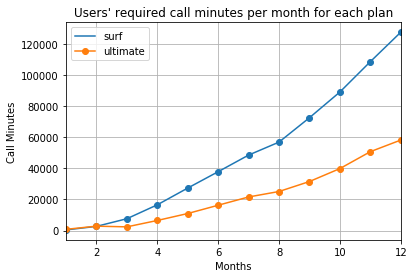

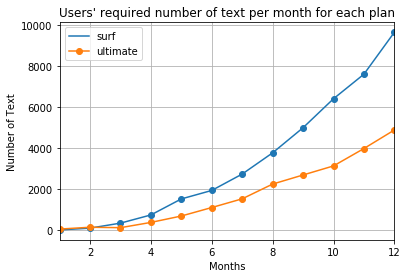

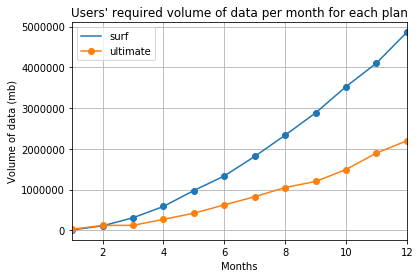

In [13]:
# create a dataframe for surf plan
data_surf = megaline.query('plan == "surf"')

# calculate the monthly call minutes, text and volume of data
surf_month_sum = data_surf.pivot_table(
    index='month', values=['mins_per_month', 'messages_per_month', 'mb_used_per_month'], aggfunc='sum')
surf_month_sum.reset_index(level='month', inplace=True)
display(surf_month_sum)

# create a dataframe for ultimate plan
data_ultimate = megaline.query('plan == "ultimate"')

# calculate the monthly call minutes, text and volume of data
ultimate_month_sum = data_ultimate.pivot_table(
    index='month', values=['mins_per_month', 'messages_per_month', 'mb_used_per_month'], aggfunc='sum')
ultimate_month_sum.reset_index(level='month', inplace=True)
display(ultimate_month_sum)



# create a line plot showing the minutes used monthly
ax1 = plt.gca()
surf_month_sum.plot(x='month', y='mins_per_month', kind='line', ax=ax1, label='surf', marker='o', grid=True)
ultimate_month_sum.plot(x='month', y='mins_per_month', kind='line', ax=ax1, label='ultimate', marker='o', grid=True)
plt.title("Users' required call minutes per month for each plan")
plt.xlabel('Months')
plt.ylabel('Call Minutes')
plt.show()

# create a line plot to show the number of text sent monthly
ax2 = plt.gca()
surf_month_sum.plot(x='month', y='messages_per_month', kind='line', ax=ax2, label='surf', marker='o', grid=True)
ultimate_month_sum.plot(x='month', y='messages_per_month', kind='line', ax=ax2, label='ultimate', marker='o', grid=True)
plt.title("Users' required number of text per month for each plan")
plt.xlabel('Months')
plt.ylabel('Number of Text')
plt.show()

# create a line plot to show the volume of data used monthly 
ax3 = plt.gca()
surf_month_sum.plot(x='month', y='mb_used_per_month', kind='line', ax=ax3, label='surf', marker='o', grid=True)
ultimate_month_sum.plot(x='month', y='mb_used_per_month', kind='line', ax=ax3, label='ultimate', marker='o', grid=True)
plt.title("Users' required volume of data per month for each plan")
plt.xlabel('Months')
plt.ylabel('Volume of data (mb)')
plt.show()

**Conclusion**

We decided to create two dataframe to save data on the users of each plan.

We then decided to create line plots to know the minutes, text, and volume of data the user of each plan require per month.  
From the line plots, we discovered that:  
* as the month goes by, there is increase in minutes spent on calls for both plan, but users on surf plan spend more minutes on calls compare to users on ultimate plan as the gap between two keep increasing as the month goes by. At the beginning of year (January), the minutes spent on calls for users on ultimate plan (774 mins) is more than that of users on surf plan (406 mins), but by December, the total minutes on calls for surf plan (127508 mins) users has over doubled that for users on ultimate plan (58185 mins).  
* as the month goes by, there is also an increase in the number of sent by users for both plan, with users on surf plan sending more text than the users on ultimate plan every month apart from January and February.
* the applied to the volume of data used for both plans. The volume increases as the month goes by, and the volume of data used monthly by surf plan users is always more than that of users on ultimate plan except for January and February.  


These monthly increaments in the minutes, text, and volume of data for users of each plan could be that there are always new users subscribed to each plan monthly, and population of users on surf plan are always more than the population of users on ultimate plan. And also, the fall in the minutes and text for users on ultimate plan in February could be that users migrated to surf plan, did not subscribe for the month, or stopped using Megaline.


[<a href="#Table-of-content">Back to top</a>]

#### Mean, dispersion, and standard deviation.

In [14]:
# >>> DATA_SURF <<<

# calculate the mean, variance and standard deviation of the column mins_per_month
display('The average minutes spent on call by users on surf plan in a month is {:.0f}'
        .format(np.ceil(surf_month_sum['mins_per_month'].mean())))
surf_min_var = np.var(surf_month_sum['mins_per_month'])
surf_min_std = np.std(surf_month_sum['mins_per_month'])

display('Variance: {}'.format(surf_min_var))
display('Standard deviation: {}'.format(surf_min_std))



# calculate the mean, variance and standard deviation of the column messages_per_month
display('The average number of text sent by users on surf plan in a month is {:.0f}'
        .format(np.ceil(surf_month_sum['messages_per_month'].mean())))
surf_msg_var = np.var(surf_month_sum['messages_per_month'])
surf_msg_std = np.std(surf_month_sum['messages_per_month'])

display('Variance: {}'.format(surf_msg_var))
display('Standard deviation: {}'.format(surf_msg_std))


# calculate the mean, variance and standard deviation of the column mb_used_per_month
display('The average volume of data used by users on surf plan in a month is {:.0f}'
        .format(np.ceil(surf_month_sum['mb_used_per_month'].mean())))
surf_mb_var = np.var(surf_month_sum['mb_used_per_month'])
surf_mb_std = np.std(surf_month_sum['messages_per_month'])

display('Variance: {}'.format(surf_mb_var))
display('Standard deviation: {}'.format(surf_mb_std))


# >>> DATA_ULTIMATE <<<

# calculate the mean, variance and standard deviation of the column mins_per_month
display('The average minutes spent on call by users on ultimate plan in a month is {:.0f}'
        .format(np.ceil(ultimate_month_sum['mins_per_month'].mean())))
ultimate_min_var = np.var(ultimate_month_sum['mins_per_month'])
ultimate_min_std = np.std(ultimate_month_sum['mins_per_month'])

display('Variance: {}'.format(ultimate_min_var))
display('Standard deviation: {}'.format(ultimate_min_std))


# calculate the mean, variance and standard deviation of the column messages_per_month
display('The average number of text sent by users on ultimate plan in a month is {:.0f}'
        .format(np.ceil(ultimate_month_sum['messages_per_month'].mean())))
ultimate_msg_var = np.var(ultimate_month_sum['messages_per_month'])
ultimate_msg_std = np.std(ultimate_month_sum['messages_per_month'])

display('Variance: {}'.format(ultimate_msg_var))
display('Standard deviation: {}'.format(ultimate_msg_std))


# calculate the mean, variance and standard deviation of the column mb_used_per_month
display('The average volume of data used by users on ultimate plan in a month is {:.0f}'
        .format(np.ceil(ultimate_month_sum['mb_used_per_month'].mean())))
ultimate_mb_var = np.var(ultimate_month_sum['mb_used_per_month'])
ultimate_mb_std = np.std(ultimate_month_sum['messages_per_month'])

display('Variance: {}'.format(ultimate_mb_var))
display('Standard deviation: {}'.format(ultimate_mb_std))

'The average minutes spent on call by users on surf plan in a month is 49618'

'Variance: 1650182042.6875'

'Standard deviation: 40622.432751959845'

'The average number of text sent by users on surf plan in a month is 3323'

'Variance: 9415134.138888888'

'Standard deviation: 3068.409056643017'

'The average volume of data used by users on surf plan in a month is 1902589'

'Variance: 2468440900186.389'

'Standard deviation: 3068.409056643017'

'The average minutes spent on call by users on ultimate plan in a month is 22217'

'Variance: 345926943.7430556'

'Standard deviation: 18599.111369714832'

'The average number of text sent by users on ultimate plan in a month is 1753'

'Variance: 2445763.909722222'

'Standard deviation: 1563.8938294277596'

'The average volume of data used by users on ultimate plan in a month is 852896'

'Variance: 482788312763.0'

'Standard deviation: 1563.8938294277596'

**Conclusion**

For surf plan users,  
1. the average minutes spent on calls in a month is 49618 minutes, that is approximately over 1600 minutes of calls per day (more than 24 hours of calls daily). With a variance of 1650182042.6875 and standard deviation of 40622.432751959845, we can say that the values of column ['mins_per_month']() are very spread out from the mean, and from one another.
2. the average number of text sent in a month is 3323, that is approximately 110 text per day. With a variance of 9415134.138888888 and standard deviation of 3068.409056643017, we can say that the values of column ['messages_per_month']() are very spread out from the mean, and from one another.
3. the average volume of data used in a month is 1902589 megabyte. With a variance of 2468440900186.389 and standard deviation of 3068.409056643017, we can say that the values of column ['mb_used_per_month']() are very spread out from the mean, and from one another.

For ultimate plan users,  
1. the average minutes spent on calls in a month is 22217 minutes, that is approximately over 740 minutes of calls per day (more than 24 hours of calls daily). With a variance of 345926943.7430556 and standard deviation of 18599.111369714832, we can say that the values of column ['mins_per_month']() are very spread out from the mean, and from one another.
2. the average number of text sent in a month is 1753, that is approximately 58 text per day. With a variance of 2445763.909722222 and standard deviation of 1563.8938294277596, we can say that the values of column ['messages_per_month']() are very spread out from the mean, and from one another.
3. the average volume of data used in a month is 852896 megabyte. With a variance of 482788312763.0 and standard deviation of 1563.8938294277596, we can say that the values of column ['mb_used_per_month']() are very spread out from the mean, and from one another.

We can conclude that our datasets are very spread out from the mean, and from one another.


[<a href="#Table-of-content">Back to top</a>]

#### Histograms and distributions

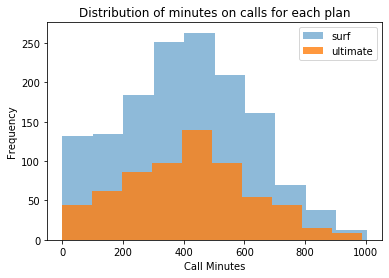

413.0

409.21855670103093

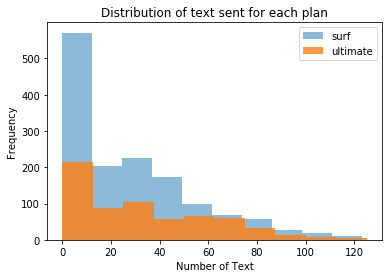

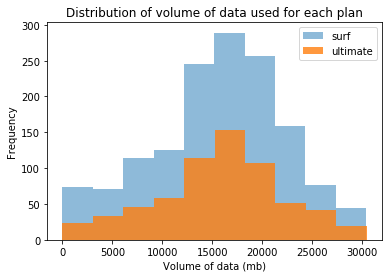

In [15]:
# plot histogram to compare the parameters for each plan
ax = plt.gca()
data_surf.plot(y='mins_per_month', kind='hist', bins=10, ax=ax, alpha=0.5, label= 'surf')
data_ultimate.plot(y='mins_per_month', kind='hist', bins=10, ax=ax, alpha=0.8, label='ultimate')
plt.title("Distribution of minutes on calls for each plan")
plt.xlabel('Call Minutes')
plt.show()
display(data_surf['mins_per_month'].median())
display(data_surf['mins_per_month'].mean())

bx = plt.gca()
data_surf.plot(y='messages_per_month', kind='hist', ax=bx, alpha=0.5, label= 'surf')
data_ultimate.plot(y='messages_per_month', kind='hist',ax=bx, alpha=0.8, label='ultimate')
plt.title("Distribution of text sent for each plan")
plt.xlabel('Number of Text')
plt.show()

cx = plt.gca()
data_surf.plot(y='mb_used_per_month', kind='hist', ax=cx, alpha=0.5, label= 'surf')
data_ultimate.plot(y='mb_used_per_month', kind='hist',ax=cx, alpha=0.8, label='ultimate')
plt.title("Distribution of volume of data used for each plan")
plt.xlabel('Volume of data (mb)')
plt.show()

**Conclusion**

We decided to determine how the datasets for our parameters are distributed by plotting histograms of the parameters for each plan.  
1. For the minutes of calls used, we can see from the histogram titled [Distribution of minutes on calls for each plan](), that the surf plan have higher frequency of minutes on call than ultimate plan, but the two variables are both slightly skewed to the left. This implies that the median is slighly greater than the mean. It means that users on surf plan spend more minutes on calls than users on ultimate plan.
2. For the number of text sent, we can see from the histogram titled [Distribution of text sent for each plan](), that the surf plan have higher frequency of text than ultimate plan, but the distribution for both plan are skewed heavily to the right, that is, positive skewed. This implies that the means of both variables will be greater than the median. This means that users on surf plan do send more text compared to users on ultimate plan.
3. For the volume of data used, we can see from the histogram titled [Distribution of volume of data used for each plan](), that the surf plan have higher frquency of volume of data than ultimate plan, but both plan are skewed to the left, that is, negative skewed. This implies that the mean of both variables will be lesser than the medain. This means that users on surf plan consume more volume of data compared to ultimate plan users.

[<a href="#Table-of-content">Back to top</a>]

### Step 4. Test the hypotheses

#### The average revenue from users of Ultimate and Surf calling plans differs.

In [16]:
# statistical population size
display('The population size of users on surf plan is {}'.format(len(data_surf)))
display('The population size of users on ultimate plan is {}'.format(len(data_ultimate)))

# randomly select 10 percent of rows from dataframe
sample_surf = data_surf.sample(frac=0.1, random_state=2)
sample_ultimate = data_ultimate.sample(frac=0.1, random_state=2)

# compare variance of poplations
data_surf_var = np.var(data_surf['monthly_revenue'])
data_ultimate_var = np.var(data_ultimate['monthly_revenue'])

if data_surf_var == data_ultimate_var:
    display('The variance of the two populations is equal')
else:
    display('The variance of the two populations is not equal')

# indicate the statistical significance level
alpha = 0.05

# use the method st.ttest_1samp
results_test_1 = st.ttest_ind(sample_surf['monthly_revenue'], sample_ultimate['monthly_revenue'], equal_var=False)

display('p-value: {}'.format(results_test_1.pvalue))

if (results_test_1.pvalue < alpha):
    display("We reject the null hypothesis")
else:
    display("We can't reject the null hypothesis")


'The population size of users on surf plan is 1455'

'The population size of users on ultimate plan is 648'

'The variance of the two populations is not equal'

'p-value: 4.149314687010995e-08'

'We reject the null hypothesis'

**Conclusion**

To determine if the average revenue from users of ultimate and surf plan differs, it is not sufficient for us to simply compare the average values of the revenue for each plan. We need to carry out a correct test to determine if the average revenue differ.

First, we will formulate our null hypothesis and alternative hypothesis. Since our goal is to determine if the average revenue from users of ultimate and surf calling plans differs, meaning that the means of revenue of the two plans are either equal or not equal, our null hypothesis will be stated with an equal sign, and alternative hypothesis will be stated with not equal sign.

H₀: Average revenue from users of ultimate plans = Average revenue from users of surf plans  
H₁: Average revenue from users of ultimate plans ≠  Average revenue from users of surf plans

We will be using the t-test of since we want to test our hypothesis that means of the two statistical populations are equal based on samples taken from them, and the alternative hypothesis is two-sided, that is bilateral. We will be applying the method [scipy.stats.ttest_ind(array1, array2, equal_var)]().

We will determine the size of the two populations (users of ultimate plan and users of surf plan) to be able to decide on the sample size. The population size of users of ultimate plan is 648, and the poplation size of users of surf plan is 1455. We then decided to select 10% users from each population to carry out our test as we considered this sufficient enough to draw conclusions about the statistical parameters of the populations. That is, a sample size of 65 users drawn from 648 users of ultimate plan, and also, sample size of 146 users drawn from 1455 users of surf plan.

We decided to compare the variances of the two populations so that we can sure whether to estimate the variance of each sample as a combined data set or separately.

We set our significance level (alpha) to 0.05, which indicates a 5% risk of concluding that a difference exists when there is no actual difference. Lower significance levels indicate that we require stronger evidence before we reject or do not reject the null hypothesis.

After carrying out the test, we have a p-value of 4.149314687010995e-08. Since the p-value is lesser than our significance level, we reject our null hypothesis. Our analysis suggests that the revenue generated from each plan differs, meaning one is bring in more revenue than the other.



[<a href="#Table-of-content">Back to top</a>]

#### The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [17]:
display(users['city'].value_counts())

# create a dataframe for users from NY-NJ
filter_ny_nj = users.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
display(filter_ny_nj.head())

# select the users from NY-NJ from megaline dataframe
users_ny_nj = megaline.query('user_id in @filter_ny_nj.user_id')


# create a dataframe for users from other regions
filter_other_region = users.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
display(filter_other_region.head())

# select the users from other regions from megaline dataframe
users_other_region = megaline.query('user_id in @filter_other_region.user_id')

# statistical population size
display('The population size of the users from NY-NJ is {}'.format(len(users_ny_nj)))
display('The population size of the users from other region is {}'.format(len(users_other_region)))

# randomly select 10 percent of rows from dataframe
sample_ny_nj = users_ny_nj.sample(frac=0.1, random_state=2)
sample_other_region = users_other_region.sample(frac=0.1, random_state=2)


# compare variance of poplations
users_nj_ny_var = np.var(users_ny_nj['monthly_revenue'])
users_other_region_var = np.var(users_other_region['monthly_revenue'])

if users_nj_ny_var == users_other_region_var:
    display('The variance of the two populations is equal')
else:
    display('The variance of the two populations is not equal')


# indicate the statistical significance level
alpha = 0.05

# use the method st.ttest_1samp
results_2 = st.ttest_ind(sample_ny_nj['monthly_revenue'], sample_other_region['monthly_revenue'], equal_var=False)

display('p-value: {}'.format(results_2.pvalue))

if (results_2.pvalue < alpha):
    display("We reject the null hypothesis")
else:
    display("We can't reject the null hypothesis")

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
Greensboro-High Point, NC MSA                       1
Raleigh-Cary, NC MSA                                1
Albany-Schenectady-Troy, NY MSA                     1
Name: city, Length: 73, dtype: int64

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,NaT
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaT
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


'The population size of the users from NY-NJ is 355'

'The population size of the users from other region is 1748'

'The variance of the two populations is not equal'

'p-value: 0.43964169356655014'

"We can't reject the null hypothesis"

**Conclusion**  

To determine if the average revenue from users in NY-NJ area is different from that of the users from other regions, we need to carry out a correct test to determine if the average revenue differ.

First, we will formulate our null hypothesis and alternative hypothesis. Since our goal is to determine if the average revenue from users in NY-NJ area and other regions differs, meaning that the means of revenue of the two selected regions are either equal or not equal, our null hypothesis will be stated with an equal sign, and alternative hypothesis will be stated with not equal sign.

H₀: Average revenue from users in NY-NJ area = Average revenue from users from other regions  
H₁: Average revenue from users in NY-NJ area ≠  Average revenue from users from other regions

We will be using the t-test of since we want to test our hypothesis that means of the two statistical populations are equal based on samples taken from them, and the alternative hypothesis is two-sided, that is bilateral. We will be applying the method [scipy.stats.ttest_ind(array1, array2, equal_var)]().

We will determine the size of the two populations (users in NY-NJ and users from other regions) to be able to decide on the sample size. The population size of users in NY-NJ is 355, and the poplation size of users from other regions is 1748. We then decided to select 10% users from each population to carry out our test as we considered this sufficient enough to draw conclusions about the statistical parameters of the populations. That is, a sample size of 36 users drawn from 355 users of ultimate plan, and also, sample size of 175 users drawn from 1748 users of surf plan.

We decided to compare the variances of the two populations so that we can sure whether to estimate the variance of each sample as a combined data set or separately and set our significance level (alpha) to 0.05.

After carrying out the test, we have a p-value of 0.43964169356655014. Since the p-value is greater than our significance level, we can not reject our null hypothesis. Our analysis suggests that the revenue generated from users in NY-NJ areas do not differ from the revenue generated from other regions, meaning that irrespective of the area, the percentage of revenue generated is most likely to be the same.

[<a href="#Table-of-content">Back to top</a>]

### Step 5. Write an overall conclusion

Given 5 different data sets to analyze with details on users information, calls, messages, internet, and plan for Megaline customers.  
While preparing the datasets, we discovered that all the columns saving date are not in the right, so we changed them to the datetime format. There is no duplicate in our datasets.  
We discovered that there are some couple of calls with 0 minutes and volume of data used with 0 megabyte. We decided to delete the rows from our datasets as we assumed that the calls might be missed calls, and users might be on home or public wifi throughout the day with 0 megabyte.

We calculated the number of calls made and minutes used per month on the calls dataset, the number of text messages sent per month on the messages dataset,and the volume of data used per month on the internet dataset, saving the results in new columns created in the respective datasets. We also calculated the monthly revenue by merging the dataset together. We checked for outliers in merged dataset and filtered them out.

We created three line plots to visualize the cutomers' behaviour based on minutes of calls made monthly, number of text sent monthly, and volume of data used monthly the users on each required. We discovered that there is increase in these three trends as the month goes on. This could be as a result of new users always joining each plan every month.

These monthly increaments in the minutes, text, and volume of data for users of each plan could be that there are always new users subscribed to each plan monthly, and population of users on surf plan are always more than the population of users on ultimate plan. And also, the fall in the minutes and text for users on ultimate plan in February could be that users migrated to surf plan, did not subscribe for the month, or stopped using Megaline.

The dataset consist of variables with different distributions. Plotting histograms to compare the three parameters for each plan, we discovered that the variable on minutes of calls made is slightly skewed to the left, the variable on text sent is skewed heavily to the right, and the variable on volume of data is skewed to the left. We also discovered from the histograms that users on surf plan spend more minutes on calls monthly, send more text monthly, and use more volume of data than users on ultimate plan. 

We then decided to carrying out two hypothesis tests.  
The first test is to determine if the average revenue from users of ultimate and surf plan differs. After carrying out the test, we rejected hypothesis that the average revenue from users of ultimate plans is equal to the average revenue from users of surf plans, suggesting that one of plans will generate more revenue than the other.

The second test is to determine if the average revenue from users in NY-NJ area is different from that of the users from other regions. After carrying out the test, we could not reject the null hypothesis that the average revenue from users in NY-NJ area is equal to the average revenue from users from other regions. This suggest that the revenue generated in diferrent regions are relatively equal.

From our analysis, we can conclude that users on surf plan brings in more revenue than users on ultimate plan. We will therefore recommend the commercial department to invest more in advertising surf plan in order to maximize revenue.


[<a href="#Table-of-content">Back to top</a>]